# French departments - Predictive analysis

## Predict French citizen's wage 
By Trang VO

https://github.com/trang-h-vo

Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')
import geopandas as gpd
import descartes

In [3]:
str(os.getcwd()) + '/'

'/Users/HuyenTrang/Desktop/ML PROJECT/ML_Project_Group7_Submission/'

In [4]:
folder_path = str(os.getcwd()) + '/'
city_adm = pd.read_csv(folder_path + 'city_adm.csv')
city_loc = pd.read_csv(folder_path + 'city_loc.csv')
city_pop = pd.read_csv(folder_path + 'city_pop.csv')
code_activity_sector = pd.read_csv(folder_path + 'code_activity_sector.csv')
code_DEGREE = pd.read_csv(folder_path + 'code_DEGREE.csv')
code_employee_count = pd.read_csv(folder_path + 'code_employee_count.csv')
code_Employer_category = pd.read_csv(folder_path + 'code_Employer_category.csv')
code_household_type = pd.read_csv(folder_path + 'code_household_type.csv')
code_JOB_CATEGORY = pd.read_csv(folder_path + 'code_JOB_CATEGORY.csv')
code_Job_description_map = pd.read_csv(folder_path + 'code_Job_description_map.csv')
code_job_description_n1 = pd.read_csv(folder_path + 'code_Job_description_n1.csv')
code_Job_description_n2 = pd.read_csv(folder_path + 'code_Job_description_n2.csv')
code_Job_description = pd.read_csv(folder_path + 'code_Job_description.csv')
code_type_of_contract = pd.read_csv(folder_path + 'code_type_of_contract.csv')
code_work_condition = pd.read_csv(folder_path + 'code_work_condition.csv')
departments = pd.read_csv(folder_path + 'departments.csv')
regions = pd.read_csv(folder_path + 'regions.csv')

In [5]:
learn = pd.read_csv(folder_path + 'learn.csv')
test = pd.read_csv(folder_path + 'test.csv')

### DATA PREPARATION

In [6]:
print(learn.shape)
learn.head(3)

(10184, 15)


,household_type,job_dep,work_condition,DEGREE,Employer_category,JOB_CATEGORY,Job_description,type_of_contract,working_hours,employee_count,INSEE_CODE,Age_2019,activity_sector,Sex,Wage
0,M_3_1,92,C,educ|1,ct_9,X,564b,AUT,1531.0,tr_2,75118,21,JC,Female,4804
1,M_4_1,59,C,educ|2,ct_7,O,563c,CDI,868.0,tr_1,59008,53,TZ,Female,10536
2,M_4_1,93,D,educ|2,ct_7,O,563a,CDI,1398.0,tr_1,93063,52,QB,Female,7119


In [7]:
learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10184 entries, 0 to 10183
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   household_type     10184 non-null  object 
 1   job_dep            10184 non-null  object 
 2   work_condition     10184 non-null  object 
 3   DEGREE             10184 non-null  object 
 4   Employer_category  10184 non-null  object 
 5   JOB_CATEGORY       10184 non-null  object 
 6   Job_description    10184 non-null  object 
 7   type_of_contract   10184 non-null  object 
 8   working_hours      10147 non-null  float64
 9   employee_count     10184 non-null  object 
 10  INSEE_CODE         10184 non-null  object 
 11  Age_2019           10184 non-null  int64  
 12  activity_sector    10184 non-null  object 
 13  Sex                10184 non-null  object 
 14  Wage               10184 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.2+ MB


In [8]:
print(test.shape)
test.head(3)

(10180, 14)


,household_type,job_dep,work_condition,DEGREE,Employer_category,JOB_CATEGORY,Job_description,type_of_contract,working_hours,employee_count,INSEE_CODE,Age_2019,activity_sector,Sex
0,M_4_1,95,P,educ|1,ct_2,O,523c,CDD,550.0,tr_6,78146,52,OZ,Female
1,M_4_1,59,P,educ|2,ct_9,O,676c,TTP,1142.0,tr_4,59599,29,NZ,Male
2,M_4_1,92,C,educ|2,ct_9,X,676e,AUT,798.0,tr_6,75108,27,CL,Male


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   household_type     10180 non-null  object 
 1   job_dep            10180 non-null  object 
 2   work_condition     10180 non-null  object 
 3   DEGREE             10180 non-null  object 
 4   Employer_category  10180 non-null  object 
 5   JOB_CATEGORY       10180 non-null  object 
 6   Job_description    10180 non-null  object 
 7   type_of_contract   10180 non-null  object 
 8   working_hours      10148 non-null  float64
 9   employee_count     10180 non-null  object 
 10  INSEE_CODE         10180 non-null  object 
 11  Age_2019           10180 non-null  int64  
 12  activity_sector    10180 non-null  object 
 13  Sex                10180 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


Note:

- The learn set & test set are of similar in both structure and size, with 13 features and 10.000+ instances.
- 11 out of 13 features are categorical.
- Both data sets have with missing values in 'working_hours' column. We're required not to drop any rows in both data sets ,even though the number of rows with missing values is very small.
- In the test set, the target values are not provided.

#### CATEGORICAL FEATURES

Our strategy to treat categorical variables:

- Variables with high number of categories: Analyze features on learn set in relation with the target variable ('Wage') & regrouping the categories.
- Variables with low number of categories & relatively balanced distribution: use one-hot-encoding.
- Variables with low number of categories but highly imbalanced distribution: turn to a binary variable.
- Create a function to transform all the categorical features, except those directly go through one-hot-encoding in the pipeline. This function can be applied to both train & test set.

##### Household_type

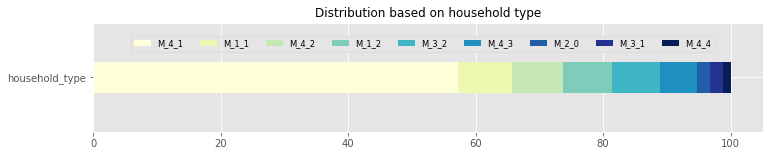

In [10]:
household_type_pct = learn.household_type.value_counts(normalize=True)*100

household_type_pct.to_frame().T.plot.barh(stacked=True, figsize=(12,2), width=0.2, colormap='YlGnBu')
plt.title('Distribution based on household type', fontsize=12)
plt.legend(ncol=9, bbox_to_anchor=(0.05, 0.7), loc='lower left', fontsize='small')
plt.show()

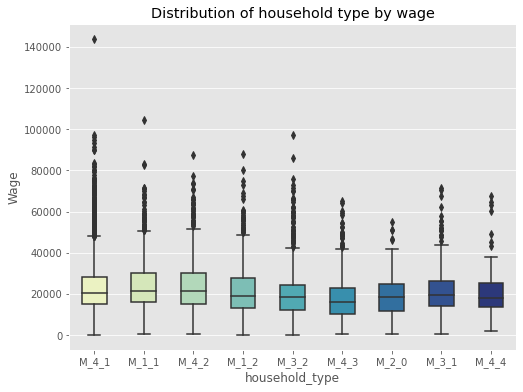

In [11]:
# style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(data=learn, x='household_type', y='Wage',width=0.5, order=household_type_pct.index, palette="YlGnBu")
plt.title('Distribution of household type by wage')
plt.show()

There is no observable difference in wage across different types of household. We'll use one hot encoding for all categories, test their importances and reduce the dimensions later.

##### Work condition

In [12]:
code_work_condition

,Code,Libellé
0,C,Temps complet
1,D,Travail à domicile
2,F,Faible temps partiel
3,K,Condition d'emploi mixte à dominante temps com...
4,P,Temps partiel
5,Y,Condition d'emploi mixte à dominante temps non...


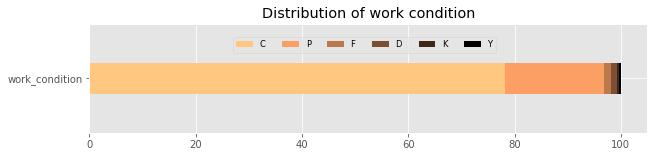

In [13]:
work_contract_pct = learn.work_condition.value_counts(normalize=True)*100

work_contract_pct.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2, colormap='copper_r')
plt.title('Distribution of work condition')
plt.legend(ncol=6, bbox_to_anchor=(0.25, 0.7), loc='lower left', fontsize='small')
plt.show()      

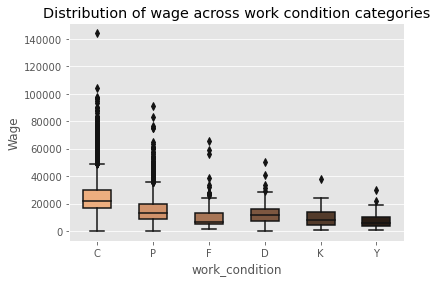

In [14]:
# distribution of wage across work condition categories
sns.boxplot(y='Wage', x='work_condition', data=learn, order=work_contract_pct.index, width=0.5, palette="copper_r")
plt.title('Distribution of wage across work condition categories')
plt.show()

Based on the dominance of full-time and part-time categories, as well as their characteristics, we'll regroup this feature into 3 categories:

    - 1: Full-time (C)
    - 2: Part-time & work from home (P & D)
    - 3: Others (F, K, Y)
    
We can also merge the last 2 groups, but we'll come back on this later.

In [15]:
def trans_work_condition(x):
    return 'fulltime' if x == 'C'\
        else 'parttime_wfh' if x in ['P', 'D']\
        else 'others'

##### Degree

Regroup the degrees into 4 level: middle school & below, high school, bachelor & equivalent, master's and phD.

In [16]:
up_to_middle = ['educ|1', 'educ|2', 'educ|3', 'educ|1|1', 'educ|1|2']
high_school = ['educ|1|3', 'educ|1|4', 'educ|1|5']
bachelor = ['educ|1|6', 'educ|1|7']
masters_phD = ['educ|1|8', 'educ|1|9']

def trans_degree(x):
    return 'up_to_middle' if x in up_to_middle \
        else 'high_school' if x in high_school \
        else 'bachelor' if x in bachelor \
        else 'masters_phD'

##### Employer category

In [17]:
code_Employer_category

,Code,Libellé
0,ct_1,Fonction Publique d'État
1,ct_2,Fonction Publique Territoriale
2,ct_3,Fonction Publique Hospitalière
3,ct_4,Autres organismes publics administratifs
4,ct_5,Personnes morales de droit public soumises au ...
5,ct_6,Entreprises individuelles
6,ct_7,Particuliers Employeurs
7,ct_8,Organismes privés spécialisés et groupements d...
8,ct_9,Autres sociétés privées


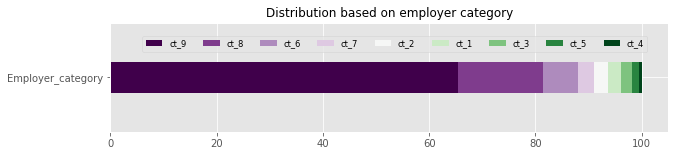

In [18]:
employer_pct = learn.Employer_category.value_counts(normalize=True)*100

employer_pct.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2, colormap='PRGn')
plt.title('Distribution based on employer category', fontsize=12)
plt.legend(ncol=9, bbox_to_anchor=(0.05, 0.7), loc='lower left', fontsize='small')
plt.show()

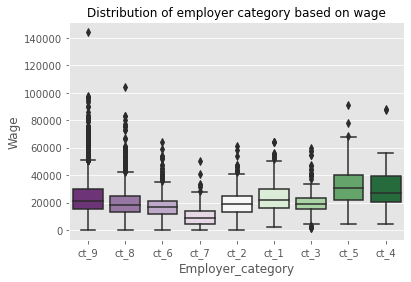

In [19]:
sns.boxplot(data=learn, y='Wage', x='Employer_category', order=employer_pct.index, palette="PRGn")
plt.title('Distribution of employer category based on wage', fontsize=12)
plt.show()

Option 1: as the employer category can have a significant affect on the wage, we can encode all these categories and test their significance. If there's no clear significance, we can go back and regroup them to reduce the dimension.

Option 2: Based on the employer's characteristics, we can regroup them into 3 categories: 

    - Public service: ct-1, ct-2, ct-3, ct-4 & ct-5
    - Private company: ct-6, ct-8, ct-9
    - Individuals Employers: ct-7

##### Job category

In [20]:
learn.JOB_CATEGORY.value_counts(normalize=True)*100

O    96.278476
X     2.091516
A     1.630008
Name: JOB_CATEGORY, dtype: float64

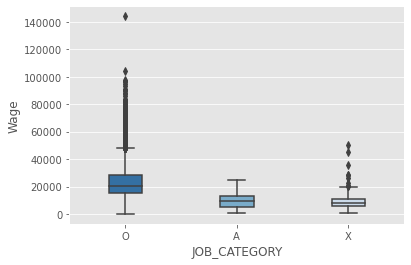

In [21]:
sns.boxplot(y='Wage', x='JOB_CATEGORY',data=learn, width=0.3, order=code_JOB_CATEGORY.Code, palette="Blues_r")
plt.show()

The 'ordinary job' category accounts for more than 95% of the people in the learn set. The boxplot shows sign that salary range of this group is higher than other minority groups. So we can recategorize this group into 'emploi ordinaire' & others.

##### Job description

In [22]:
print(code_Job_description.shape)
code_Job_description.head(3)

(429, 2)


,Code,Libellé
0,100x,"Agriculteurs et éleveurs, salariés de leur exp..."
1,210x,Artisans salariés de leur entreprise
2,220x,"Commerçants et assimilés, salariés de leur ent..."


In [23]:
# sector
code_job_description_n1

,Code,Libellé
0,1,Agriculteurs
1,2,"Artisans, commerçants et chefs d'entreprises"
2,3,Cadres et professions intellectuelles supérieures
3,4,Professions intermédiaires
4,5,Employés
5,6,Ouvriers


In [24]:
code_Job_description_n2.head(3)

,Code,Libellé
0,10,Agriculteurs (salariés de leur exploitation)
1,21,Artisans (salariés de leur entreprise)
2,22,Commerçants et assimilés (salariés de leur ent...


In [25]:
learn['Job_description'].unique().shape

(400,)

In [26]:
# job description n1
learn['Job_description'].str.slice(stop=1).value_counts()

5    3329
4    2773
6    2282
3    1800
Name: Job_description, dtype: int64

In [27]:
# job description n2
learn['Job_description'].str.slice(stop=2).value_counts()

52    1099
46     946
56     770
54     719
37     631
43     590
38     590
47     519
55     518
67     511
63     505
62     410
68     349
42     342
34     339
64     268
53     223
48     212
65     192
45     164
33     150
35      74
69      47
31      16
Name: Job_description, dtype: int64

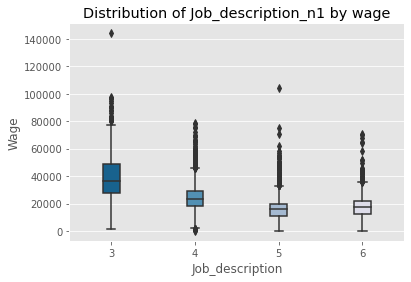

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(y=learn['Wage'],
            x=learn['Job_description'].str.slice(stop=1).sort_values(),
            width=0.2, palette="PuBu_r")
plt.title('Distribution of Job_description_n1 by wage')
plt.show()

- Group 3 lies in significantly higher range, followed by group 4.
- No clear distinction between group 5 & 6.

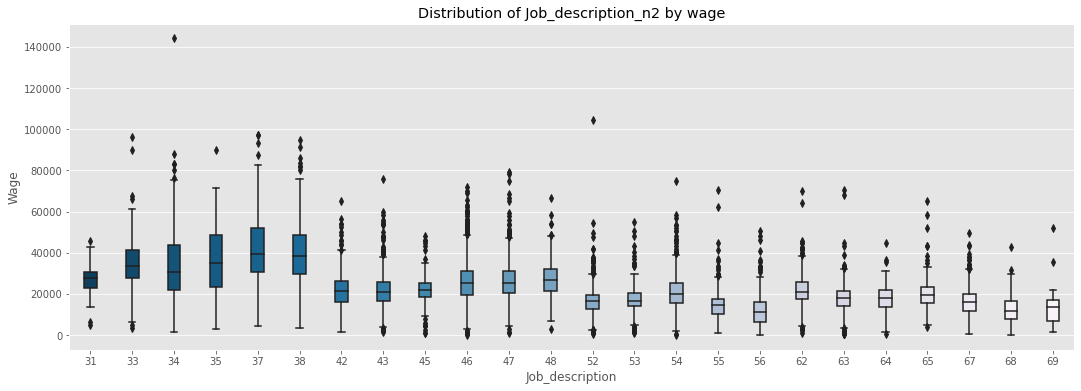

In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(y=learn['Wage'],
            x=learn['Job_description'].str.slice(stop=2).sort_values(),
            width=0.3, palette="PuBu_r")
plt.title('Distribution of Job_description_n2 by wage')
plt.show()

- The sub-group distribution by wage supports our previous observation. We'll substract the descriptions at level 1 & 2 for our models.

In [30]:
def trans_work_description(df):
    df['job_description_n1'] = df['Job_description'].str.slice(stop=1)
    df['job_description_n2'] = df['Job_description'].str.slice(stop=2)
    return df

Import external data about average hourly salary by job level 1 by department. We'll use it to replace the categorical value in job_description_n1 column.

In [31]:
n1_hourly_salary = pd.read_excel(folder_path +'Average_salary_n1_department.xlsx',
             skiprows=[0,1,2], header=0, nrows=96,
             usecols=[0,3,4,5,6])
n1_hourly_salary.head(3)

,Code,"Salaire net hor. moy. des cadres, prof. intellectuelles sup. et chefs d'entreprises salariés 2018",Salaire net hor. moy. des prof. intermédiaires 2018,Salaire net hor. moy. des employés 2018,Salaire net hor. moy. des ouvriers 2018
0,01,25.09,15.20,11.02,11.53
1,02,23.63,14.94,10.61,11.50
2,03,23.35,14.49,10.29,11.18


In [32]:
n1_hourly_salary.columns = ['job_dep', '3', '4', '5', '6']

In [33]:
n1_hourly_salary_by_dep = pd.melt(n1_hourly_salary, id_vars=['job_dep'],
        value_vars=['3', '4', '5', '6'],
        var_name='job_description_n1', value_name='n1_hourly_salary_by_dep')
print(n1_hourly_salary_by_dep.shape)
n1_hourly_salary_by_dep.head(3)

(384, 3)


,job_dep,job_description_n1,n1_hourly_salary_by_dep
0,01,3,25.09
1,02,3,23.63
2,03,3,23.35


##### Type of contract

In [34]:
code_type_of_contract

,Code,Libellé
0,CDI,CDI
1,CDD,CDD
2,APP,Contrat d'apprentissage
3,TOA,Travail occasionnel ou à l'acte
4,TTP,Contrat de travail temporaire
5,AUT,Autre


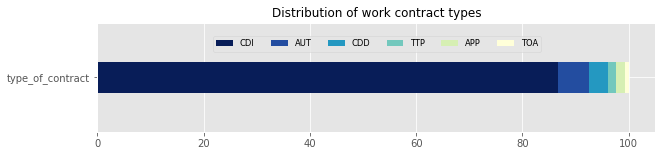

In [35]:
type_of_contract_pct = learn.type_of_contract.value_counts(normalize=True)*100
type_of_contract_pct.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2, colormap='YlGnBu_r')
plt.title('Distribution of work contract types', fontsize=12)
plt.legend(ncol=9, bbox_to_anchor=(0.2, 0.7), loc='lower left', fontsize='small')
plt.show()

Again, the majority of people in the learn set have CDI contract. We'll regroup them as CDI contract (valued as 1) and non-CDI contract (valued as 0).

##### Employee count (company size)

In [36]:
code_employee_count

,Code,Libellé
0,tr_0,"0 poste (salariés présents en cours d'année, m..."
1,tr_1,[1;10[ postes
2,tr_2,[10;20[ postes
3,tr_3,[20;50[ postes
4,tr_4,[50;100[ postes
5,tr_5,[100;250[ postes
6,tr_6,[250;+[ postes


In [37]:
learn.employee_count.value_counts()

tr_1    2304
tr_6    2270
tr_3    1653
tr_5    1430
tr_4    1267
tr_2    1117
tr_0     143
Name: employee_count, dtype: int64

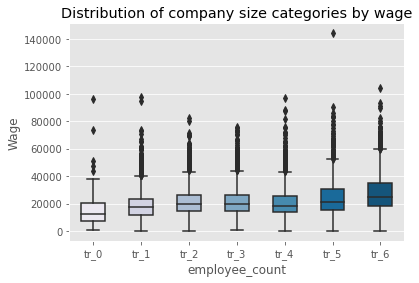

In [38]:
sns.boxplot(data=learn, x='employee_count',y='Wage', width=0.5, order=code_employee_count.Code, palette="PuBu")
plt.title('Distribution of company size categories by wage')
plt.show()

We'll regroup the enterprises into 3 categories: 

    - Micro: 10 employees or less (tr_0 & tr_1)
    - Small & medium: from 10 to 250 employees (tr_2, tr_3, tr_4 & tr_5)
    - Large: more than 250 employees (tr_6)

In [39]:
micro= ['tr_0', 'tr_1']
small_medium = ['tr_2', 'tr_3', 'tr_4', 'tr_5']
large = ['tr_6']
def trans_employee_count(x):
    return 'micro' if x in micro \
         else 'small_medium' if x in small_medium \
         else 'large'

##### Activity sector

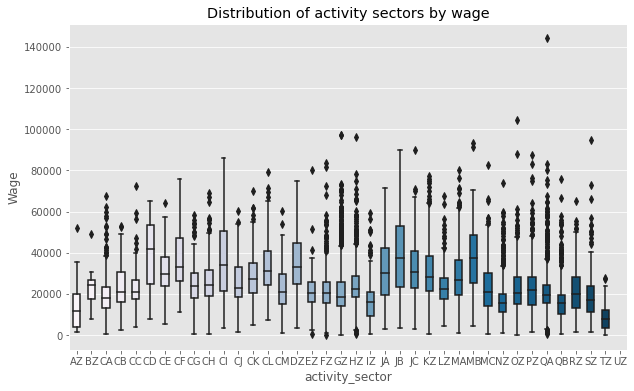

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=learn, x='activity_sector',y='Wage', width=0.5, order=code_activity_sector.Code, palette="PuBu")
plt.title('Distribution of activity sectors by wage')
plt.show()

Using a report by Statista https://www.statista.com/statistics/1129456/average-net-salary-in-france/ and the wage distribution across industries from the learn set, we'll regroup the industries into 3 main categories as follows:

Highest_pay:
    
    - CD Coking and refining
    - CE Chemical industry
    - CF Pharmaceutical
    - CI Manufacture of computer, electronic and electrical products
    - CJ Manufacture of electrical equipment
    - CK Manufacture of machinery and equipment n.e.c.
    - CL Manufacture of transport equipment 
    - DZ Electricity generation and distribution, distribution of electricity, gas and water, ...
    - JA Publishing & audiovisual
    - JB Telecomunication
    - JC IT service
    - KZ Financial and insurance activities
    - MA Legal, accounting & management activities
    - MB Scientific research

Lowest_pay:
    
    - CA Manufacture of foodstuffs
    - AZ Agriculture, forestry and fishing
    - IZ Accommodation and catering
    - NZ Administrative and support service activities
    - QB Medico-social and social housing and action
    - TZ Activities of households as employers
    - SZ Other service activities

Average_pay: the others.

In [41]:
high = ['CD', 'CE', 'CF', 'CI', 'CJ', 'CK', 'CL', 'DZ', 'JA', 'JB', 'JC', 'KZ', 'MA', 'MB']
low = ['CA', 'AZ', 'IZ', 'NZ', 'QB', 'TZ', 'SZ']

def trans_activity_sector(x):
    return 'high_pay' if x in high \
        else 'low_pay' if x in low \
        else 'average_pay'

##### Gender

In [42]:
learn.Sex.value_counts()

Female    5147
Male      5037
Name: Sex, dtype: int64

- The gender distribution in the learn set is balanced. We'll use one hot encoding to transform it into a binary variable.
- We'll use external data about average hourly salary by gender by department to replace the gender categories.

In [43]:
gender_hourly_salary = pd.read_excel(folder_path +'Average_salary_by_gender_department.xlsx',
             skiprows=[0,1,2], header=0, nrows=96,
             usecols=[0,2,3]) 
gender_hourly_salary.head(3)

,Code,Salaire net hor. moy. des hommes 2018,Salaire net hor. moy. des femmes 2018
0,01,15.42,12.67
1,02,13.86,11.88
2,03,13.55,11.65


In [44]:
# rename the columns for our convenience
gender_hourly_salary.columns = ['job_dep', 'Male', 'Female']

In [45]:
gender_hourly_salary = pd.melt(gender_hourly_salary, id_vars=['job_dep'],
        value_vars=['Male', 'Female'],
        var_name='Sex', value_name='gender_hourly_salary_by_dep')
print(gender_hourly_salary.shape)
gender_hourly_salary.head(3)

(192, 3)


,job_dep,Sex,gender_hourly_salary_by_dep
0,01,Male,15.42
1,02,Male,13.86
2,03,Male,13.55


#### NUMERICAL FEATURES

- For missing values in 'working_hours' column, we'll impute the median value using SimpleImputer combined with a pipeline during preprocessing step to avoid data leakage.
- To help encode the location feature, we add:

    - City population
    - Department population density
    - Department 

    - average salary data at department level, characterized by:

    - Job level: combine hourly salary & working hours to get annual salary
    - Age group and gender: using hourly salary data to avoid colinearity with working_hours variable.

##### Age & working hours

We'll divide the age values to 3 age groups and add average salary data based on age groups later, while keeping the original values.

In [46]:
age_bins = [14, 25, 50, 76]
age_labels = ['below_25', '26-50', '51_plus']

Import external data about average salary by age group, at department level.

In [47]:
age_group_hourly_salary = pd.read_excel(folder_path +'Average_salary_by_age_group_department.xlsx',
             skiprows=[0,1,2], header=0, nrows=96,
             usecols=[0,2,3,4]) 
age_group_hourly_salary.head(3)

,Code,Salaire net hor. moy. des 18 à 25 ans 2018,Salaire net hor. moy. des 26 à 50 ans 2018,Salaire net hor. moy. des 51 ans ou + 2018
0,01,9.93,14.25,16.29
1,02,9.74,12.95,14.93
2,03,9.62,12.53,14.59


In [48]:
age_group_hourly_salary.columns = ['job_dep', 'below_25', '26-50', '51_plus']

In [49]:
age_group_hourly_salary = pd.melt(age_group_hourly_salary, id_vars=['job_dep'],
        value_vars=['below_25', '26-50', '51_plus'],
        var_name='age_group', value_name='age_group_hourly_salary_by_dep')
print(age_group_hourly_salary.shape)
age_group_hourly_salary.head(3)

(288, 3)


,job_dep,age_group,age_group_hourly_salary_by_dep
0,01,below_25,9.93
1,02,below_25,9.74
2,03,below_25,9.62


##### City population

In [50]:
print(city_pop.shape)
city_pop.head(3)

(35795, 2)


,INSEE_CODE,inhabitants
0,01001,785
1,01002,241
2,01004,14557


In [51]:
print(city_adm.shape)
city_adm.head(3)

(35795, 4)


,Nom de la commune,INSEE_CODE,TOWN_TYPE,Dep
0,L' Abergement-Clémenciat,01001,Commune simple,01
1,L' Abergement-de-Varey,01002,Commune simple,01
2,Ambérieu-en-Bugey,01004,Chef-lieu canton,01


In [52]:
# merge with city_adm data set to get department code
city_info = pd.merge(city_pop, city_adm[['INSEE_CODE', 'Dep']], on='INSEE_CODE', how='left')
print(city_info.shape)
city_info.head(3)

(35795, 3)


,INSEE_CODE,inhabitants,Dep
0,01001,785,01
1,01002,241,01
2,01004,14557,01


##### Department population

In [53]:
dep_pop = city_info.groupby(['Dep'])['inhabitants'].sum().reset_index()
print(dep_pop.shape)
dep_pop.head(3)

(96, 2)


,Dep,inhabitants
0,01,643309
1,02,554040
2,03,353262


##### Department area

In [54]:
city_area = pd.read_excel(folder_path + 'base_cc_comparateur.xlsx', sheet_name='COM', 
                        skiprows=[0,1,2,3,4], usecols=[0, 3, 6], names=['INSEE_CODE', 'Dep', 'dep_area'])

In [55]:
print(city_area.shape)
city_area.head(3)

(34951, 3)


,INSEE_CODE,Dep,dep_area
0,01001,01,15.95
1,01002,01,9.15
2,01004,01,24.60


In [56]:
dep_area = city_area.groupby(['Dep'])['dep_area'].sum().reset_index()
# take only 96 departments
dep_area = dep_area[:96]
print(dep_area.shape)
dep_area.head(3)

(96, 2)


,Dep,dep_area
0,01,5762.39
1,02,7361.65
2,03,7340.11


##### Household median income

In [57]:
median_income = pd.read_excel(folder_path + 'FILO2018_DISP_DEP.xlsx',
                                  sheet_name='ENSEMBLE', header=None,
                                  skiprows=[0,1,2,3,4,5], nrows=96, usecols=[0, 6],
                                  names=['Dep', 'dep_median_income_2018'])

In [58]:
print(median_income.shape)
median_income.head(3)

(96, 2)


,Dep,dep_median_income_2018
0,01,23420
1,02,19690
2,03,20360


##### Full department info
To merge with learn set & test set in department analysis.

In [59]:
print(departments.shape)
departments.columns

(96, 3)


Index(['Nom du département', 'reg', 'Dep'], dtype='object')

In [60]:
# join the population & area data
full_departments = pd.merge(departments, dep_area, on='Dep', how='left')
full_departments = full_departments.merge(dep_pop, on='Dep', how='left')
full_departments = full_departments.merge(median_income, on='Dep', how='left')
full_departments.columns

Index(['Nom du département', 'reg', 'Dep', 'dep_area', 'inhabitants',
       'dep_median_income_2018'],
      dtype='object')

In [61]:
# rename some columns
full_departments.rename(columns = {'Nom du département': 'dep_name',
                                   'reg': 'region',
                                   'Dep': 'job_dep',
                                   'inhabitants': 'dep_population'}, inplace=True)
# create a home_dep column as key to join later
full_departments['home_dep'] = full_departments['job_dep']

In [62]:
# calculate department population density
full_departments['dep_pop_density'] = full_departments['dep_population'] / full_departments['dep_area']
full_departments.head(3)

,dep_name,region,job_dep,dep_area,dep_population,dep_median_income_2018,home_dep,dep_pop_density
0,Ain,84,01,5762.39,643309,23420,01,111.639268
1,Aisne,32,02,7361.65,554040,19690,02,75.260302
2,Allier,84,03,7340.11,353262,20360,03,48.127617


#### FEATURE TRANSFORMER

Prepare for ML:

- Recategorize the categorical features.
- Incorporate department data: median income & population density, average salary by job level (n1), gender & age group.
- Drop unused columns.

In [63]:
def preprocessing(df):
    
    # add home department code
    df = df.merge(city_adm[['INSEE_CODE', 'TOWN_TYPE', 'Dep']], on='INSEE_CODE', how='left')
    df.rename(columns={'Dep': 'home_dep'}, inplace=True)
    
    # add city population
    df = df.merge(city_pop, on='INSEE_CODE', how='left')
    df.rename(columns={'inhabitants': 'city_population'}, inplace=True)
    
    # recategorize
    df['work_condition_new'] = df['work_condition'].apply(trans_work_condition)
    df['degree_new'] = df['DEGREE'].apply(trans_degree)
    df['employee_count_new'] = df['employee_count'].apply(trans_employee_count)
    df['activity_sector_new'] = df['activity_sector'].apply(trans_activity_sector)
    
    df = trans_work_description(df)
    
    # turn to binary
    df['job_category_ordinary'] = np.where(df['JOB_CATEGORY']=='O', 1, 0)
    df['type_of_contract_CDI'] = np.where(df['type_of_contract']=='CDI', 1, 0)
    df['gender_female'] = np.where(df['Sex']=='Female', 1, 0)
    
    # add age groups
    age_bins = [14, 25, 50, 76]
    age_labels = ['below_25', '26-50', '51_plus']
    df['age_group'] = pd.cut(df['Age_2019'], age_bins, labels=age_labels)
    
     # add department info: choose by home_dep or job_dep
    dep_info = ['job_dep', 'region', 'dep_median_income_2018','dep_pop_density']
    df = df.merge(full_departments[dep_info], on='job_dep', how='left')
    
    # add average salary data at department level
    # by job level 1
    df = df.merge(n1_hourly_salary_by_dep, on=['job_dep', 'job_description_n1'], how='left')
    df['n1_salary_by_dep'] = df['n1_hourly_salary_by_dep'] * df['working_hours']
    
    # by gender
    df = df.merge(gender_hourly_salary, on=['job_dep', 'Sex'], how='left')
    
    # by age group
    df = df.merge(age_group_hourly_salary, on=['job_dep', 'age_group'], how='left')
    
    # drop unused columns
    cols_to_drop = ['INSEE_CODE', 'DEGREE', 'work_condition', 'employee_count', 'activity_sector',
               'Job_description', 'JOB_CATEGORY', 'type_of_contract', 'job_dep', 'home_dep',
               'age_group', 'job_description_n1', 'n1_hourly_salary_by_dep', 'Sex']
    df.drop(cols_to_drop, axis=1, inplace=True)
    
    return df

### PREDICTIVE ANALYSIS

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [67]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
from sklearn.metrics import mean_squared_error, r2_score

#### Prepare pipeline

- Select features & target for modeling
- Split the learn set into 90% for training & 10% for validation
- Impute missing values in working_hours
- Scale numerical features
- Use One-Hot-Encoding for categorical features

In [68]:
df_model = preprocessing(learn)
df_model.columns

Index(['household_type', 'Employer_category', 'working_hours', 'Age_2019',
       'Wage', 'TOWN_TYPE', 'city_population', 'work_condition_new',
       'degree_new', 'employee_count_new', 'activity_sector_new',
       'job_description_n2', 'job_category_ordinary', 'type_of_contract_CDI',
       'gender_female', 'region', 'dep_median_income_2018', 'dep_pop_density',
       'n1_salary_by_dep', 'gender_hourly_salary_by_dep',
       'age_group_hourly_salary_by_dep'],
      dtype='object')

In [69]:
df_model.corr()

,working_hours,Age_2019,Wage,city_population,job_category_ordinary,type_of_contract_CDI,gender_female,region,dep_median_income_2018,dep_pop_density,n1_salary_by_dep,gender_hourly_salary_by_dep,age_group_hourly_salary_by_dep
working_hours,1.000000,0.078180,0.547347,0.017519,0.142452,0.247836,-0.109660,-0.042722,0.026971,0.017906,0.623178,0.072608,0.085007
Age_2019,0.078180,1.000000,0.189695,-0.002766,0.237279,0.276093,0.044105,0.014515,-0.021103,0.000993,0.072862,-0.025484,0.439587
Wage,0.547347,0.189695,1.000000,0.062343,0.197735,0.205208,-0.162069,-0.140458,0.190328,0.185735,0.775499,0.269287,0.298306
city_population,0.017519,-0.002766,0.062343,1.000000,0.018378,0.002492,-0.015605,0.024899,0.122652,0.139200,0.082879,0.147236,0.125217
job_category_ordinary,0.142452,0.237279,0.197735,0.018378,1.000000,0.448598,0.024431,0.019475,0.013172,-0.005208,0.121141,-0.008086,0.160135
type_of_contract_CDI,0.247836,0.276093,0.205208,0.002492,0.448598,1.000000,-0.016016,-0.020669,0.025582,0.021309,0.193896,0.032443,0.176622
gender_female,-0.109660,0.044105,-0.162069,-0.015605,0.024431,-0.016016,1.000000,0.000636,0.010493,0.016037,-0.111334,-0.390031,0.021894
region,-0.042722,0.014515,-0.140458,0.024899,0.019475,-0.020669,0.000636,1.000000,-0.336615,-0.489792,-0.189098,-0.431119,-0.370925
dep_median_income_2018,0.026971,-0.021103,0.190328,0.122652,0.013172,0.025582,0.010493,-0.336615,1.000000,0.701722,0.306460,0.813375,0.721138
dep_pop_density,0.017906,0.000993,0.185735,0.139200,-0.005208,0.021309,0.016037,-0.489792,0.701722,1.000000,0.288345,0.765196,0.693690


In [70]:
# numerical features to scale
num_features = ['job_category_ordinary', 'type_of_contract_CDI',
                'working_hours', 'Age_2019', 'gender_female',
                'city_population','dep_pop_density', 'dep_median_income_2018', 
                'n1_salary_by_dep', 'age_group_hourly_salary_by_dep', 'gender_hourly_salary_by_dep']

# categorical features to pass through one-hot-encoding
cat_features = ['work_condition_new', 'degree_new', 
                'activity_sector_new', 'household_type', 'employee_count_new',
                'job_description_n2', 'Employer_category',
                'region', 'TOWN_TYPE']

# features for modeling
X = df_model[num_features + cat_features]
y = df_model['Wage']

Split to train & test set (for validation):

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

Create a column transformer:

In [72]:
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                           ])
one_hot = OneHotEncoder(drop='first', sparse=False) 

full_transformer = ColumnTransformer([('num', num_transformer, num_features),
                                      ('cat', one_hot, cat_features)
                                      ])

Functions to get model/GridSearchCV scores:

In [73]:
def get_model_score(model_name, model):
    model_pipeline = make_pipeline(full_transformer, model)
    # fit the full train set
    model_pipeline.fit(X_train, y_train)
    
    # get score on train set
    print('\n', model_name, ' scores on train set:')
    y_train_pred = model_pipeline.predict(X_train)
    print('Mse: ', mean_squared_error(y_train, y_train_pred))
    print('R2 score: ', r2_score(y_train,y_train_pred))
    
    # get score on test set
    print('\n', model_name, ' scores on test set:')
    y_pred = model_pipeline.predict(X_test)
    print('Mse: ', mean_squared_error(y_test, y_pred))
    print('R2 score: ', r2_score(y_test,y_pred))

In [74]:
def get_cv_score(model_name, model):
    model_pipeline = make_pipeline(full_transformer, model)
    cv_model = cross_val_score(model_pipeline, X_train, y_train, 
                                   cv=5, scoring='neg_mean_squared_error')
    print(model_name, 'cv scores:')
    print('CV mse :\n', -cv_model)
    print('CV mse - mean :', (-cv_model).mean())
    print('CV mse - std:', cv_model.std())

In [75]:
def get_grid_score(model_name, model, params_grid_model):
    model_pipeline = make_pipeline(full_transformer, model)
    
    model_grid = GridSearchCV(model_pipeline,
                        param_grid=params_grid_model,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True
                       )

    warnings. filterwarnings("ignore")
    model_grid.fit(X_train, y_train)
    
    print(model_name, ' - Best hyperparameters:\n{}'.format(model_grid.best_params_))
    
    # get score on train set
    print('\n', model_name, ' GridSearch best scores on train set:')
    model_grid.best_estimator_.fit(X_train, y_train)
    y_train_pred = model_grid.predict(X_train)
    print('Mse: ', mean_squared_error(y_train, y_train_pred))
    print('R2 score: ', r2_score(y_train,y_train_pred))
    
    # get score on test set
    print('\n', model_name, ' GridSearch best scores on test set:')
    y_pred = model_grid.predict(X_test)
    print('Mse: ', mean_squared_error(y_test, y_pred))
    print('R2 score: ', r2_score(y_test,y_pred))

In [76]:
def get_prediction(model, X_train, y_train, X_test):
    model_pipeline = make_pipeline(full_transformer, model)
    model_pipeline.fit(X_train, y_train)
    return model_pipeline.predict(X_test)

#### Linear Regression

In [77]:
lr =  LinearRegression()

In [78]:
get_cv_score('LR', lr)

LR cv scores:
CV mse :
 [55487421.57690374 60769540.61009615 54945046.06249279 48485357.46531514
 56343934.71268491]
CV mse - mean : 55206260.08549855
CV mse - std: 3938583.7640645104


Fit the full train set & predict on test set

In [79]:
get_model_score('LR', lr)


 LR  scores on train set:
Mse:  54126496.25171331
R2 score:  0.6857965232569956

 LR  scores on test set:
Mse:  52261840.95789223
R2 score:  0.6841885185800073


#### Stochastic Gradient Descent Regressor

In [80]:
sgd = SGDRegressor(max_iter=3000, tol=1e-3, penalty='elasticnet', eta0=0.1, random_state=2)

In [81]:
get_model_score('SGD', sgd)


 SGD  scores on train set:
Mse:  56352977.875603944
R2 score:  0.6728718317366442

 SGD  scores on test set:
Mse:  55054399.384360455
R2 score:  0.6673134526150447


In [82]:
get_cv_score('SGD', sgd)

SGD cv scores:
CV mse :
 [57407916.63964541 62070504.67516782 57546279.94676445 49167565.75401141
 56651478.89010178]
CV mse - mean : 56568749.18113817
CV mse - std: 4164455.360883819


#### Random Forest Regressor

In [83]:
rf = RandomForestRegressor()

In [84]:
get_cv_score('RF', rf)
get_model_score('RF', rf)

RF cv scores:
CV mse :
 [52315969.25853311 57096230.39336437 53815210.84961805 47310732.69349067
 56517129.7800623 ]
CV mse - mean : 53411054.59501369
CV mse - std: 3515812.998281801

 RF  scores on train set:
Mse:  7313015.096322388
R2 score:  0.9575480600471005

 RF  scores on test set:
Mse:  47293865.17322885
R2 score:  0.7142093476104523


Default model overfitted heavily on the train set.

To tune hyperparamters, we'll first use RandomizedSearchCV to search in a large space of parameters, then narrow down the parameters' ranges and tune more closely.

In [85]:
# Number of trees in random forest
n_estimators = [100, 150, 200, 500, 750, 1000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in range(3, 15)]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(4, 10)]

# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split
               }
print(random_grid)

{'randomforestregressor__n_estimators': [100, 150, 200, 500, 750, 1000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'randomforestregressor__min_samples_split': [4, 5, 6, 7, 8, 9]}


In [86]:
rf = RandomForestRegressor()
rf_pipe = make_pipeline(full_transformer, rf)

rf_random = RandomizedSearchCV(estimator = rf_pipe,
                               param_distributions = random_grid,
                               n_iter = 150, # limit to 150 searches (450 cv fits)
                               cv = 3,       # 3-fold cv to reduce the run time
                               verbose=2, 
                               random_state=22,
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 32.9min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['job_category_ordinary',
                                                                                'type_of_contract_CDI',
                                                                                'working_hours',
                                                       

In [87]:
rf_random.best_params_

{'randomforestregressor__n_estimators': 750,
 'randomforestregressor__min_samples_split': 9,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_depth': 14}

In [88]:
# get_model_score('RF RandomizedSearch', rf_random.best_estimator_)
rf_random.best_estimator_.fit(X_train, y_train)

# get score on train set
print('RF RandomizedSearch best scores on train set:')
y_train_pred_rs = rf_random.best_estimator_.predict(X_train)
print('Mse: ', mean_squared_error(y_train, y_train_pred_rs))
print('R2 score: ', r2_score(y_train, y_train_pred_rs))
    
# get score on test set
print('RF RandomizedSearch best scores on test set:')
y_pred_rs = rf_random.best_estimator_.predict(X_test)
print('Mse: ', mean_squared_error(y_test, y_pred_rs))
print('R2 score: ', r2_score(y_test,y_pred_rs))

RF RandomizedSearch best scores on train set:
Mse:  22831479.04497404
R2 score:  0.8674636159385836
RF RandomizedSearch best scores on test set:
Mse:  46575752.793933555
R2 score:  0.7185488069592726


As our training set is quite small, setting small max_features meaning increasing the number of trees and max_depth substantially, or risk underfitting. This means high model complexity & longer training time. Within the scope of this project, we'll prioritize less complex model and light computational power. 

From here onwards, we'll fix max_features as 'auto' and let Random Forest use all features for each tree.

Let's do another round of RandomizedSearchCV, this time with lower range of trees & max_depth to reduce model complexity, but keep small min_sample_leaf to avoid underfitting.

In [89]:
# 2nd round of RandomizedSearchCV
n_estimators2 = [100, 150, 200]

# Number of features to consider at every split
max_features2 = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth2 = [int(x) for x in range(3, 15)]

# Minimum number of samples required to split a node
min_samples_split2 = [int(x) for x in range(4, 10)]

# Create the random grid
random_grid2 = {'randomforestregressor__n_estimators': [100,120,150,200],
               'randomforestregressor__max_features': ['auto'],
               'randomforestregressor__max_depth': [3,4,5,6],
               'randomforestregressor__min_samples_split': [3,4,5]
               }
print(random_grid2)

{'randomforestregressor__n_estimators': [100, 120, 150, 200], 'randomforestregressor__max_features': ['auto'], 'randomforestregressor__max_depth': [3, 4, 5, 6], 'randomforestregressor__min_samples_split': [3, 4, 5]}


In [90]:
rf2 = RandomForestRegressor()
rf_pipe2 = make_pipeline(full_transformer, rf2)

rf_random2 = RandomizedSearchCV(estimator = rf_pipe2,
                               param_distributions = random_grid2,
                               n_iter = 100,
                               cv = 3,
                               verbose=2, 
                               random_state=22,
                               n_jobs = -1)

rf_random2.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['job_category_ordinary',
                                                                                'type_of_contract_CDI',
                                                                                'working_hours',
                                                       

In [91]:
rf_random2.best_params_

{'randomforestregressor__n_estimators': 200,
 'randomforestregressor__min_samples_split': 3,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_depth': 6}

In [92]:
rf_random2.best_estimator_.fit(X_train, y_train)

# get score on train set
print('RF RandomizedSearch_2 best scores on train set:')
y_train_pred_rs2 = rf_random2.best_estimator_.predict(X_train)
print('Mse: ', mean_squared_error(y_train, y_train_pred_rs2))
print('R2 score: ', r2_score(y_train, y_train_pred_rs2))
    
# get score on test set
print('RF RandomizedSearch_2 best scores on test set:')
y_pred_rs2 = rf_random.best_estimator_.predict(X_test)
print('Mse: ', mean_squared_error(y_test, y_pred_rs2))
print('R2 score: ', r2_score(y_test,y_pred_rs2))

RF RandomizedSearch_2 best scores on train set:
Mse:  49192402.54018299
R2 score:  0.714438861226351
RF RandomizedSearch_2 best scores on test set:
Mse:  46575752.793933555
R2 score:  0.7185488069592726


Great, we have no overfitting issue. Now we'll use GridSearchCV to narrow down the search, by looking for values close to the optimal values suggested by RandomizedSearch.

In [93]:
rf_grid = RandomForestRegressor(max_features='auto')

%timeit
# set hyper-parameters
params_rf_grid = {'randomforestregressor__n_estimators': [150,200,250],
              'randomforestregressor__max_depth': [5,6,7],
              'randomforestregressor__min_samples_leaf': [2,3,4]
            }

get_grid_score('RF with GridSearch', rf_grid, params_rf_grid)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.6min finished


RF with GridSearch  - Best hyperparameters:
{'randomforestregressor__max_depth': 7, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__n_estimators': 250}

 RF with GridSearch  GridSearch best scores on train set:
Mse:  46031048.6883236
R2 score:  0.7327904716252536

 RF with GridSearch  GridSearch best scores on test set:
Mse:  50113471.24259278
R2 score:  0.6971708362709058


In this case, increasing the model complexity actually causes overfitting, the model fitted better on the training set but performs worse on the test set. We want to avoid this so we'll choose the parameters suggested earlier by RandomizedSearch. 

Final model:

In [96]:
rf_random2.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['job_category_ordinary',
                                                   'type_of_contract_CDI',
                                                   'working_hours', 'Age_2019',
                                                   'gender_female',
                                                   'city_population',
                                                   'dep_pop_density',
                                                   'dep_median_income_2018',
                                            

#### XGBoost Regression

In [97]:
# get score of the default XGBRegressor
xgb = XGBRegressor()
get_model_score('XGB', xgb)


 XGB  scores on train set:
Mse:  14441223.783992779
R2 score:  0.9161689184488703

 XGB  scores on test set:
Mse:  45119837.472761825
R2 score:  0.7273467131557223


As the training data is quite small, the default XGBRegressor overfits easily.

We'll tune the hyperparameters step by step using GridSearchCV:

- Step 1: Fix some parameters, tune n_estimators & learning rate first:

    - n_estimators in [100, 150] for our small dataset
    - learning rate in [0.05, 0.1, 0.2]

In [98]:
xgb1 = XGBRegressor(max_depth=3,
                   gamma=0,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   seed=3)
params_xgb1 = {'xgbregressor__n_estimators': [100, 150],  
              'xgbregressor__learning_rate': [0.05, 0.1, 0.2]
              }
get_grid_score('XGB1', xgb1, params_xgb1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   56.3s finished


XGB1  - Best hyperparameters:
{'xgbregressor__learning_rate': 0.1, 'xgbregressor__n_estimators': 150}

 XGB1  GridSearch best scores on train set:
Mse:  43447715.609374136
R2 score:  0.7477866803437414

 XGB1  GridSearch best scores on test set:
Mse:  45719712.484888874
R2 score:  0.7237217467792161


Step 2: Tune max_depth & min_child_weight:
    
    - max_depth in [3, 4, 5]
    - min_child_weight in [1, 2, 3]

In [100]:
xgb2 = XGBRegressor(n_estimators=150,
                   max_depth=3,
                   gamma=0, 
                   learning_rate=0.1,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   seed=3
                   )
params_xgb2 = {'xgbregressor__min_child_weight': [1,2,3,4],
               'xgbregressor__max_depth': [3,4,5],
              }
get_grid_score('XGB2', xgb2, params_xgb2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.7min finished


XGB2  - Best hyperparameters:
{'xgbregressor__max_depth': 4, 'xgbregressor__min_child_weight': 3}

 XGB2  GridSearch best scores on train set:
Mse:  37785891.98476285
R2 score:  0.7806534792454388

 XGB2  GridSearch best scores on test set:
Mse:  43896503.309431076
R2 score:  0.7347391617819475


- Step 3: 

    - Tune gamma: [i/10.0 for i in range(0,5)]

In [101]:
xgb3 = XGBRegressor(n_estimators=150,
                   max_depth=4,
                   gamma=0, 
                   learning_rate=0.1,
                   colsample_bytree=0.8,
                   subsample=0.8,
                   min_child_weight=3,
                   seed=3
                   )
params_xgb3 = {'xgbregressor__gamma': [i/10.0 for i in range(0,5)]
              }
get_grid_score('XGB3', xgb3, params_xgb3)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


XGB3  - Best hyperparameters:
{'xgbregressor__gamma': 0.0}

 XGB3  GridSearch best scores on train set:
Mse:  37785891.98476285
R2 score:  0.7806534792454388

 XGB3  GridSearch best scores on test set:
Mse:  43896503.309431076
R2 score:  0.7347391617819475


- Step 4 - Tune subsample and colsample_bytree:

    - subsample in [0.6,0.7,0.8,0.9]
    - colsample_bytree in [0.6,0.7,0.8,0.9]


In [102]:
xgb4 = XGBRegressor(n_estimators=150,
                   max_depth=4,
                   gamma=0, 
                   learning_rate=0.1,
                   min_child_weight=2,
                   seed=3
                   )
params_xgb4 = {'xgbregressor__subsample': [0.6,0.7,0.8,0.9],
               'xgbregressor__colsample_bytree': [0.6,0.7,0.8,0.9]
              }
get_grid_score('XGB4', xgb4, params_xgb4)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.1min finished


XGB4  - Best hyperparameters:
{'xgbregressor__colsample_bytree': 0.6, 'xgbregressor__subsample': 0.7}

 XGB4  GridSearch best scores on train set:
Mse:  37949577.04587205
R2 score:  0.7797032899878111

 XGB4  GridSearch best scores on test set:
Mse:  44256932.28461575
R2 score:  0.7325611365437729


Optimal value for subsample is 0.7 & for colsample_bytree is 0.6.

We'll tune with value 0.05 above & below these.

In [103]:
xgb52 = XGBRegressor(n_estimators=150,
                   max_depth=4,
                   gamma=0, 
                   learning_rate=0.1,
                   min_child_weight=2,
                   seed=3
                   )
params_xgb52 = {'xgbregressor__subsample': [0.65,0.7,0.75],
               'xgbregressor__colsample_bytree': [0.55,0.6,0.65]
              }
get_grid_score('XGB52', xgb52, params_xgb52)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.3min finished


XGB52  - Best hyperparameters:
{'xgbregressor__colsample_bytree': 0.6, 'xgbregressor__subsample': 0.65}

 XGB52  GridSearch best scores on train set:
Mse:  38095723.19466096
R2 score:  0.7788549138459577

 XGB52  GridSearch best scores on test set:
Mse:  43533075.58613417
R2 score:  0.7369353080634373


Step 6 - Tuning Regularization Parameters
    
    - 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]

In [105]:
xgb6 = XGBRegressor(n_estimators=150,
                   max_depth=4,
                   gamma=0, 
                   learning_rate=0.1,
                   min_child_weight=2,
                   subsample=0.65,
                    colsample_bytree=0.6,
                   seed=3
                   )
params_xgb6 = {'xgbregressor__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
              }
get_grid_score('XGB6', xgb6, params_xgb6)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   41.1s finished


XGB6  - Best hyperparameters:
{'xgbregressor__reg_alpha': 1}

 XGB6  GridSearch best scores on train set:
Mse:  38095808.01442119
R2 score:  0.7788544214685564

 XGB6  GridSearch best scores on test set:
Mse:  43533094.29282737
R2 score:  0.7369351950213328


Step 7 - Reduce learning rate & incease n_estimators to get more robust model

In [107]:
xgb7 = XGBRegressor(n_estimators=150,
                   max_depth=4,
                   gamma=0, 
                   min_child_weight=2,
                   subsample=0.65,
                    colsample_bytree=0.6,
                    reg_alpha=1,
                   seed=3
                   )
params_xgb7 = {'xgbregressor__learning_rate':[0.025, 0.05, 0.1],
               'xgbregressor__n_estimators': [150,180,200]
              }
get_grid_score('XGB7', xgb7, params_xgb7)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished


XGB7  - Best hyperparameters:
{'xgbregressor__learning_rate': 0.1, 'xgbregressor__n_estimators': 150}

 XGB7  GridSearch best scores on train set:
Mse:  38095808.01442119
R2 score:  0.7788544214685564

 XGB7  GridSearch best scores on test set:
Mse:  43533094.29282737
R2 score:  0.7369351950213328


This will be our final model.

In [108]:
xgb_best = XGBRegressor(n_estimators=150,
                   max_depth=4,
                   gamma=0, 
                   min_child_weight=2,
                   subsample=0.65,
                    colsample_bytree=0.6,
                    reg_alpha=1,
                    learning_rate=0.1,
                   seed=3
                   )
get_cv_score('XGB_best', xgb_best)
get_model_score('XGB_best', xgb_best)

XGB_best cv scores:
CV mse :
 [48042592.3107811  54563934.88549487 49416223.56078857 44843768.11624543
 53781655.055312  ]
CV mse - mean : 50129634.785724394
CV mse - std: 3627819.11731811

 XGB_best  scores on train set:
Mse:  38095808.01442119
R2 score:  0.7788544214685564

 XGB_best  scores on test set:
Mse:  43533094.29282737
R2 score:  0.7369351950213328


#### Final test results

Import test file (only the predictors are provided, not the target)

In [109]:
test_raw = pd.read_csv(folder_path + 'test.csv')
test_prep = preprocessing(test_raw)
X_test_final = df_model[num_features + cat_features]

In [110]:
xgb_best_pipe = make_pipeline(full_transformer, xgb_best)
# cross validation on the full learn set
cv_xgb_best = cross_val_score(xgb_best_pipe, X, y, 
                                   cv=5, scoring='neg_mean_squared_error')

print('XGB best - cv scores:')
print('CV mse :\n', -cv_xgb_best)
print('CV mse - mean :', (-cv_xgb_best).mean())
print('CV mse - std:', cv_xgb_best.std())

XGB best - cv scores:
CV mse :
 [30106941.50547805 36977853.36990584 51754783.16054716 58666371.42531142
 81994952.59117019]
CV mse - mean : 51900180.41048253
CV mse - std: 18161051.181544855


In [113]:
print(51900180.41048253 + 18161051.181544855*1)
print(51900180.41048253 - 18161051.181544855*1)

70061231.5920274
33739129.22893768


Using the cross validation score on the full learn set, for a conservative approach, we expect our predictions on the final test set to have the mean squared error in the range of 2 standard deviation around the mean mse during cross validation:
- High bound: mse + 1 std = 70061231.5920274
- Low bound: mse - 1 std = 33739129.22893768

Model score on full learn set:

In [114]:
xgb_best_pipe.fit(X, y)
y_train_pred_xgb_best = xgb_best_pipe.predict(X)
print('XGB best - scores on full train set:')
print('Mse:', mean_squared_error(y, y_train_pred_xgb_best))
print('R2 score:', r2_score(y, y_train_pred_xgb_best))

XGB best - scores on full train set:
Mse: 38181873.07164159
R2 score: 0.7774785892085898


Get our best predictions and export to a .csv file for submission:

In [115]:
predictions = xgb_best_pipe.predict(X_test_final)

In [116]:
# predictions.to_csv(folder_path+ 'predictions.csv')